# THE CAPSTONE PROJECT WORK

## Machine Learning Model for Proactive Prediction of Cardiovascular Admissions Outcome

### The primary objective of this project is to develop different machine learning models that predicts HEART FAILURE for patients admitted with cardiovascular conditions, thus enhancing clinical decision-making and optimizing resource utilization.

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

import numpy as np


In [6]:
# display all columns of the dataframe
pd.options.display.max_columns = None

In [7]:
from sklearn.impute import KNNImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as st

from scipy.stats import shapiro,jarque_bera

from statsmodels.graphics.gofplots import qqplot

In [121]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

from sklearn.inspection import permutation_importance

In [122]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

In [123]:
import tensorflow as tf

from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [9]:
df_Admn = pd.read_csv("HDHI Admission data.csv")

In [10]:
df_Admn.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,04-01-2017,04-03-2017,81,M,R,E,Apr-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,234696,04-01-2017,04-05-2017,65,M,R,E,Apr-17,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,234882,04-01-2017,04-03-2017,53,M,U,E,Apr-17,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,NaN,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,234635,04-01-2017,04-08-2017,67,F,U,E,Apr-17,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,234486,04-01-2017,4/23/2017,60,F,U,E,Apr-17,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_Admn.shape

(15757, 56)

In [12]:
df_Admn.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

#### Renaming columns


In [13]:

df_Admn.rename(columns={'SMOKING ':'SMOKING','duration of intensive unit stay': 'DURATION OF ICU STAY'},inplace=True)

In [14]:
df_Admn.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'DURATION OF ICU STAY', 'OUTCOME', 'SMOKING', 'ALCOHOL', 'DM', 'HTN',
       'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA',
       'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA',
       'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN',
       'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI',
       'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI',
       'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS',
       'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM',
       'CHEST INFECTION'],
      dtype='object')

#### Removing duplicated patient records

In [15]:
# Duplicated patient records

df_Admn[df_Admn.duplicated(['MRD No.'])]

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,DURATION OF ICU STAY,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
16,17,413903,01-04-2017,03-04-2017,54,M,U,O,Apr-17,3,1,DISCHARGE,1,0,0,0,0,0,0,14.7,3.5,280,92,180,2.4,23,0,60,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90,91,382159,04-04-2017,04-09-2017,47,F,U,E,Apr-17,6,1,DISCHARGE,0,0,1,0,0,0,0,10,10,158,EMPTY,20,0.7,EMPTY,0,60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95,96,48098,04-05-2017,04-10-2017,65,F,R,O,Apr-17,6,4,DISCHARGE,0,0,0,1,1,0,0,12.4,7.1,196,102,19,0.6,NaN,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
130,131,384232,08-04-2017,12-04-2017,80,F,U,E,Apr-17,5,5,DISCHARGE,0,0,1,1,1,0,0,10.5,9.2,380,156,39,0.9,787,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
147,148,203622,10-04-2017,17-04-2017,58,F,U,O,Apr-17,8,0,DISCHARGE,0,1,1,1,1,0,0,8.5,8.8,345,217,57,1,1048,0,42,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15743,15744,699413,30-03-2019,02-04-2019,75,F,U,E,Mar-19,4,3,DISCHARGE,0,0,0,0,0,0,0,11.8,8.2,275,136,40,0.8,244,0,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15745,15746,699480,30-03-2019,03-04-2019,60,F,U,E,Mar-19,5,4,DAMA,0,0,0,1,1,0,0,10.2,14.7,243,374,37,1.1,445,1,45,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15748,15749,273016,30-03-2019,31-03-2019,74,F,U,E,Mar-19,2,2,DISCHARGE,0,0,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15751,15752,469963,31-03-2019,08-04-2019,60,F,U,E,Mar-19,9,9,DISCHARGE,0,0,0,0,1,0,0,8.1,25,63,222,18,0.5,1170,1,38,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# removing 3513 duplicate records, keeping the latest records among the duplicated records

df_Admn = df_Admn.drop_duplicates(['MRD No.'], keep ='last')

In [17]:
df_Admn

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,DURATION OF ICU STAY,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,04-01-2017,04-03-2017,81,M,R,E,Apr-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,234696,04-01-2017,04-05-2017,65,M,R,E,Apr-17,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4,234635,04-01-2017,04-08-2017,67,F,U,E,Apr-17,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,234486,04-01-2017,4/23/2017,60,F,U,E,Apr-17,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,208455,04-01-2017,4/13/2017,47,M,U,E,Apr-17,13,9,DISCHARGE,0,1,1,1,0,0,0,12.6,9.5,328,159,30,1,NaN,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,15752,469963,31-03-2019,08-04-2019,60,F,U,E,Mar-19,9,9,DISCHARGE,0,0,0,0,1,0,0,8.1,25,63,222,18,0.5,1170,1,38,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15752,15753,699585,31-03-2019,04-04-2019,86,F,U,O,Mar-19,5,1,DISCHARGE,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,292,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,04-01-2019,50,M,R,E,Mar-19,2,2,EXPIRY,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,206,0,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31-03-2019,09-04-2019,82,M,U,E,Mar-19,10,5,DISCHARGE,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,1120,0,32,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_Admn.shape

(12244, 56)

#### Removing records of patients Discharged Against Medical Advice

In [19]:
# Records with OUTCOME = DAMA , Discharged Against Medical Advice

df_Admn[(df_Admn['OUTCOME']== 'DAMA')]

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,DURATION OF ICU STAY,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
20,21,62180,04-01-2017,04-02-2017,35,F,R,E,Apr-17,2,1,DAMA,0,0,0,0,0,0,0,14.6,6.3,148,135,34,0.91,NaN,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,26,380213,04-01-2017,4/21/2017,56,M,U,O,Apr-17,21,5,DAMA,0,0,0,0,0,1,0,12,8.2,332,122,39,0.98,2160,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50,51,235557,04-03-2017,04-03-2017,70,M,U,E,Apr-17,1,1,DAMA,0,0,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68,69,380785,04-03-2017,04-04-2017,70,M,U,O,Apr-17,2,0,DAMA,0,0,0,0,0,0,0,14.4,9.3,219,104,25,1,EMPTY,0,EMPTY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
70,71,371985,04-03-2017,04-04-2017,37,M,U,O,Apr-17,2,0,DAMA,0,0,0,1,1,0,0,12.1,8.3,492,91,22,0.7,EMPTY,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15674,15675,698015,28-03-2019,29-03-2019,74,M,U,E,Mar-19,2,0,DAMA,0,0,1,0,0,0,0,11.4,3.7,18,160,33,0.8,113,0,30,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15679,15680,698027,28-03-2019,01-04-2019,65,M,U,E,Mar-19,5,3,DAMA,0,0,0,1,1,0,1,11.3,8.8,139,164,131,2.6,310,1,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15726,15727,698781,29-03-2019,04-04-2019,25,M,R,E,Mar-19,7,4,DAMA,0,0,0,0,0,0,0,10.1,23.2,352,94,32,0.7,229,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
15730,15731,698280,29-03-2019,30-03-2019,67,M,U,E,Mar-19,2,2,DAMA,0,0,0,0,0,0,0,13,10.5,92,110,57,1.2,57,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# removing 761 records with OUTCOME = 'DAMA'

df_Admn = df_Admn[(df_Admn['OUTCOME']!= 'DAMA')]

In [21]:
df_Admn.shape

(11483, 56)

#### Removing redundant variables

In [22]:
# SNO: Serial Number
# MRD No.: Admission Number
# Date of Admission: D.O.A
# Date of Discharge: D.O.D
# month year

df_Admn = df_Admn.drop(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'month year'], axis = 1)

In [23]:
df_Admn.reset_index(drop=True, inplace=True)

#### Dropping variables that are irrelavant for prediction of HEART FAILURE

In [24]:
# OUTCOME: OUTCOME(DISCHARGE/EXPIRY)
# DURATION OF STAY
# DURATION OF ICU STAY: DURATION OF INTENSIVE CARE UNIT STAY

df_Admn = df_Admn.drop(['OUTCOME','DURATION OF STAY', 'DURATION OF ICU STAY'], axis = 1)

In [25]:
# dropping 'HFREF','HFNEF' - as they predict HEART FAILURE directly with 100% accuracy
# HFREF - Heart Failure with Reduced Ejection Fraction
# HRNEF - Heart Failure with Normal Ejection Fraction


df_Admn = df_Admn.drop(['HFREF','HFNEF'], axis = 1)

In [26]:
df_Admn.shape

(11483, 46)

#### Checking datatypes

In [27]:
df_Admn.dtypes

AGE                                 int64
GENDER                             object
RURAL                              object
TYPE OF ADMISSION-EMERGENCY/OPD    object
SMOKING                             int64
ALCOHOL                             int64
DM                                  int64
HTN                                 int64
CAD                                 int64
PRIOR CMP                           int64
CKD                                 int64
HB                                 object
TLC                                object
PLATELETS                          object
GLUCOSE                            object
UREA                               object
CREATININE                         object
BNP                                object
RAISED CARDIAC ENZYMES              int64
EF                                 object
SEVERE ANAEMIA                      int64
ANAEMIA                             int64
STABLE ANGINA                       int64
ACS                               

#### Checking unique values of variables

In [28]:
cols = ['GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'SMOKING', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION']
for i in cols:
    print("Unique values for ",i," : ", df_Admn[i].unique())

Unique values for  GENDER  :  ['M' 'F']
Unique values for  RURAL  :  ['R' 'U']
Unique values for  TYPE OF ADMISSION-EMERGENCY/OPD  :  ['E' 'O']
Unique values for  SMOKING  :  [0 1]
Unique values for  ALCOHOL  :  [0 1]
Unique values for  DM  :  [1 0]
Unique values for  HTN  :  [0 1]
Unique values for  CAD  :  [0 1]
Unique values for  PRIOR CMP  :  [0 1]
Unique values for  CKD  :  [0 1]
Unique values for  RAISED CARDIAC ENZYMES  :  [1 0]
Unique values for  SEVERE ANAEMIA  :  [0 1]
Unique values for  ANAEMIA  :  [1 0]
Unique values for  STABLE ANGINA  :  [0 1]
Unique values for  ACS  :  [1 0]
Unique values for  STEMI  :  [0 1]
Unique values for  ATYPICAL CHEST PAIN  :  [0 1]
Unique values for  HEART FAILURE  :  [1 0]
Unique values for  VALVULAR  :  [0 1]
Unique values for  CHB  :  [0 1]
Unique values for  SSS  :  [0 1]
Unique values for  AKI  :  [0 1]
Unique values for  CVA INFRACT  :  [0 1]
Unique values for  CVA BLEED  :  [0 1]
Unique values for  AF  :  [0 1]
Unique values for  VT  :  [

In [29]:
df_Admn.replace({"\\\\":""},regex=True,inplace=True)

#### Converting datatype from object to numeric

In [30]:
df_Admn['CHEST INFECTION']= pd.to_numeric(df_Admn['CHEST INFECTION'],errors='coerce')
df_Admn['CHEST INFECTION'] = df_Admn['CHEST INFECTION'].astype('Int64')

In [31]:
cols = ['HB','TLC','PLATELETS','GLUCOSE','UREA','CREATININE','BNP','EF']
for i in cols:
    
    df_Admn[i]= pd.to_numeric(df_Admn[i],errors='coerce')
    df_Admn[i] = df_Admn[i].astype(float)

In [32]:
df_Admn.dtypes

AGE                                  int64
GENDER                              object
RURAL                               object
TYPE OF ADMISSION-EMERGENCY/OPD     object
SMOKING                              int64
ALCOHOL                              int64
DM                                   int64
HTN                                  int64
CAD                                  int64
PRIOR CMP                            int64
CKD                                  int64
HB                                 float64
TLC                                float64
PLATELETS                          float64
GLUCOSE                            float64
UREA                               float64
CREATININE                         float64
BNP                                float64
RAISED CARDIAC ENZYMES               int64
EF                                 float64
SEVERE ANAEMIA                       int64
ANAEMIA                              int64
STABLE ANGINA                        int64
ACS        

#### Checking missing values

In [33]:
df_Admn.isna().sum()

AGE                                   0
GENDER                                0
RURAL                                 0
TYPE OF ADMISSION-EMERGENCY/OPD       0
SMOKING                               0
ALCOHOL                               0
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                             0
CKD                                   0
HB                                  208
TLC                                 228
PLATELETS                           234
GLUCOSE                             606
UREA                                194
CREATININE                          202
BNP                                6885
RAISED CARDIAC ENZYMES                0
EF                                 1207
SEVERE ANAEMIA                        0
ANAEMIA                               0
STABLE ANGINA                         0
ACS                                   0
STEMI                                 0


In [34]:
# BNP has more than 50% missing values, hence dropping it
# BNP: B-TYPE NATRIURETIC PEPTIDE

df_Admn = df_Admn.drop(['BNP'], axis = 1)

In [35]:
df_Admn.shape

(11483, 45)

#### Distributions of numerical variables - 'AGE','PLATELETS','GLUCOSE','UREA'

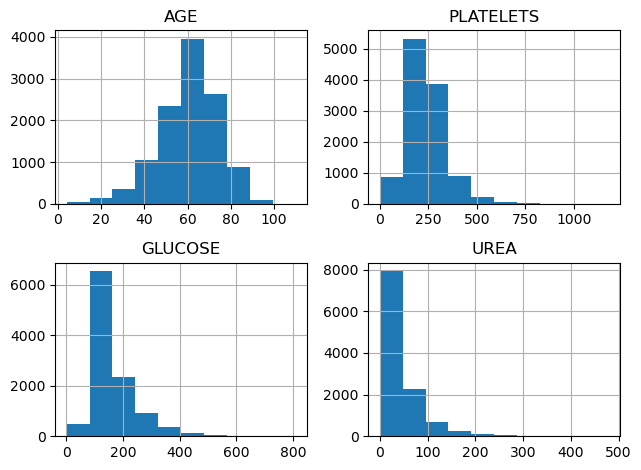

In [36]:
df_Admn[['AGE','PLATELETS','GLUCOSE','UREA']].hist()
# adjust the subplots
plt.tight_layout()
plt.show()  

#### Distributions of numeric variables - 'HB','TLC','CREATININE','EF'

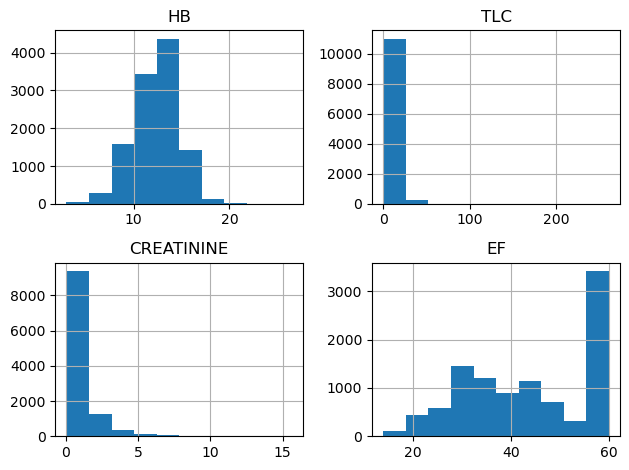

In [37]:
df_Admn[['HB','TLC','CREATININE','EF']].hist()
# adjust the subplots
plt.tight_layout()
plt.show()  

In [38]:
df_Admn[['AGE','HB','TLC','PLATELETS','GLUCOSE','UREA',
         'CREATININE','EF']].describe()

,AGE,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,EF
count,11483.000000,11275.000000,11255.000000,11249.00000,10877.000000,11289.000000,11281.000000,10276.000000
mean,60.803449,12.319333,11.400443,238.38027,160.436812,47.756091,1.297524,44.138128
std,13.469563,2.314621,7.034193,103.10556,82.628242,40.488981,1.158527,13.419905
min,4.000000,3.000000,0.100000,0.58000,1.200000,0.100000,0.065000,14.000000
25%,53.000000,10.800000,7.900000,172.00000,104.000000,25.000000,0.730000,32.000000
50%,62.000000,12.500000,10.000000,226.00000,134.000000,34.000000,0.930000,45.000000
75%,70.000000,13.900000,13.200000,288.00000,192.000000,54.000000,1.320000,60.000000
max,110.000000,26.500000,261.000000,1179.00000,809.000000,479.000000,15.630000,60.000000


In [39]:
# range of numeric values in the dataset
# EF : 14 - 60 %
# Creatinine : 0.065 - 15.63 mg/dL
# Urea : 0.10 - 479 mg/dL
# Glucose : 1.2 - 809 mg/dL
# Platelets : 0.58 - 1179 K per microL
# TLC : 0.1 - 261 K per microL
# HB : 3 - 26.5 g/dL


#### Missing value imputation of numeric variables - KNNImputer Algorithm with K=10

In [40]:
df_Admn_num = df_Admn.select_dtypes(include = 'number')

In [41]:
imputer = KNNImputer(n_neighbors = 10)
imputed = imputer.fit_transform(df_Admn_num)
df_Admn_num = pd.DataFrame(imputed, columns = df_Admn_num.columns)

In [42]:
df_Admn_num.isna().sum()

AGE                          0
SMOKING                      0
ALCOHOL                      0
DM                           0
HTN                          0
CAD                          0
PRIOR CMP                    0
CKD                          0
HB                           0
TLC                          0
PLATELETS                    0
GLUCOSE                      0
UREA                         0
CREATININE                   0
RAISED CARDIAC ENZYMES       0
EF                           0
SEVERE ANAEMIA               0
ANAEMIA                      0
STABLE ANGINA                0
ACS                          0
STEMI                        0
ATYPICAL CHEST PAIN          0
HEART FAILURE                0
VALVULAR                     0
CHB                          0
SSS                          0
AKI                          0
CVA INFRACT                  0
CVA BLEED                    0
AF                           0
VT                           0
PSVT                         0
CONGENIT

In [43]:
df_Admn_num

,AGE,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.5,16.1,337.0,80.0,34.0,0.90,1.0,35.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,13.7,9.0,149.0,112.0,18.0,0.90,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,12.8,9.9,286.0,130.0,27.0,0.60,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.6,9.1,26.0,144.0,55.0,1.25,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,12.6,9.5,328.0,159.0,30.0,1.00,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11478,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.1,25.0,63.0,222.0,18.0,0.50,1.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11479,86.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,8.8,13.7,361.0,131.0,57.0,1.40,1.0,38.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11480,50.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,13.2,15.6,142.0,248.0,94.0,1.80,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11481,82.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.3,11.7,372.0,210.0,67.0,1.90,0.0,32.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_Admn_cat = df_Admn.select_dtypes(include = 'object')

In [45]:
df_Admn_cat

,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD
0,M,R,E
1,M,R,E
2,F,U,E
3,F,U,E
4,M,U,E
...,...,...,...
11478,F,U,E
11479,F,U,O
11480,M,R,E
11481,M,U,E


In [46]:
df_Admn = pd.concat([df_Admn_cat, df_Admn_num], axis=1)

In [47]:
df_Admn

,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,AGE,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,M,R,E,81.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.5,16.1,337.0,80.0,34.0,0.90,1.0,35.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,R,E,65.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,13.7,9.0,149.0,112.0,18.0,0.90,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,U,E,67.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,12.8,9.9,286.0,130.0,27.0,0.60,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,U,E,60.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,13.6,9.1,26.0,144.0,55.0,1.25,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,U,E,47.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,12.6,9.5,328.0,159.0,30.0,1.00,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11478,F,U,E,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.1,25.0,63.0,222.0,18.0,0.50,1.0,38.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11479,F,U,O,86.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,8.8,13.7,361.0,131.0,57.0,1.40,1.0,38.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11480,M,R,E,50.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,13.2,15.6,142.0,248.0,94.0,1.80,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11481,M,U,E,82.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.3,11.7,372.0,210.0,67.0,1.90,0.0,32.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Distributions of numeric variables - 'HB','TLC','CREATININE','EF' - After Imputation

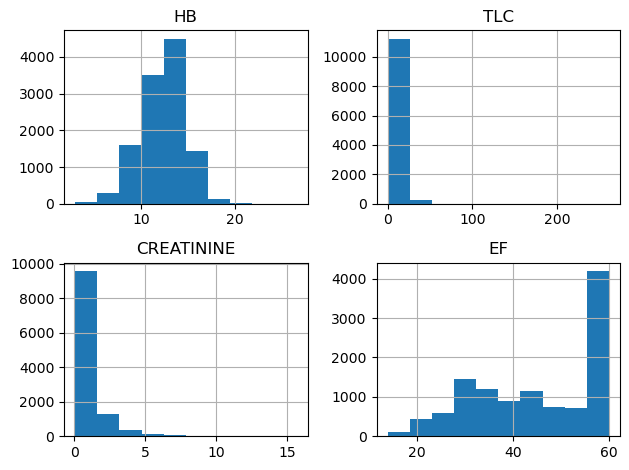

In [48]:
df_Admn[['HB','TLC','CREATININE','EF']].hist()
# adjust the subplots
plt.tight_layout()
plt.show()  

#### Distributions of numeric variables - 'PLATELETS','GLUCOSE','UREA' - After Imputation

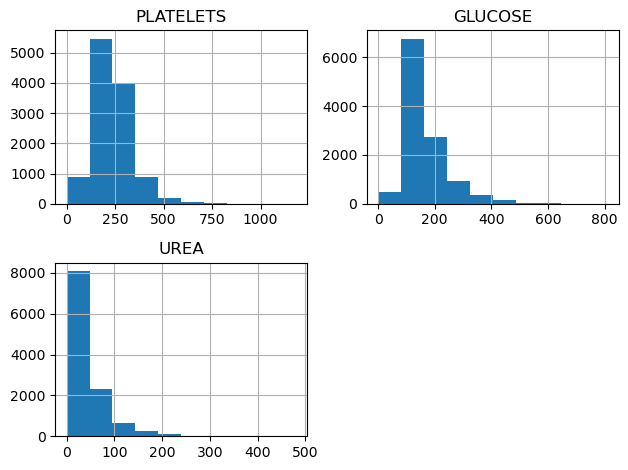

In [49]:
df_Admn[['PLATELETS','GLUCOSE','UREA']].hist()
# adjust the subplots
plt.tight_layout()
plt.show()

In [50]:
df_Admn[['HB','TLC','PLATELETS','GLUCOSE','UREA','CREATININE','EF']].describe()

,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,EF
count,11483.000000,11483.000000,11483.000000,11483.000000,11483.000000,11483.000000,11483.000000
mean,12.323281,11.400005,238.160669,161.270306,47.625828,1.293128,45.397910
std,2.297043,6.974971,102.168764,80.882185,40.219660,1.150355,13.245161
min,3.000000,0.100000,0.580000,1.200000,0.100000,0.065000,14.000000
25%,10.800000,7.900000,174.000000,106.000000,25.000000,0.740000,34.500000
50%,12.500000,10.000000,226.000000,137.000000,34.000000,0.930000,46.000000
75%,13.900000,13.200000,286.000000,193.000000,54.000000,1.300000,60.000000
max,26.500000,261.000000,1179.000000,809.000000,479.000000,15.630000,60.000000


#### Outlier Analysis

In [51]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

##### Checking outliers in AGE (years)

Text(0.5, 1.0, 'AGE (years)')

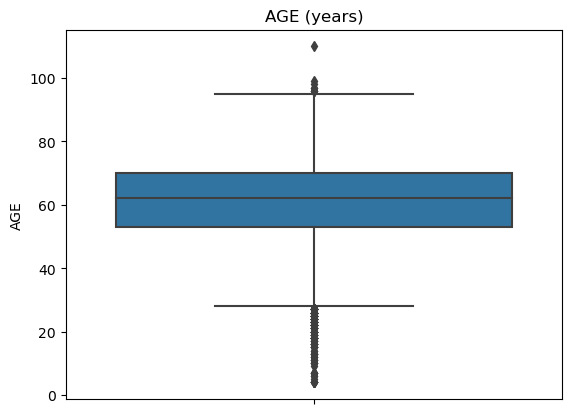

In [52]:
sns.boxplot(data = df_Admn, y = 'AGE').set_title("AGE (years)")

In [53]:
print(f"Number of outliers in AGE : {count_outliers(df_Admn, 'AGE')}")

Number of outliers in AGE : 224


In [54]:
# any AGE less greater than 100 is considered as an anomaly

df_Admn[ (df_Admn['AGE'] > 100) ].shape[0]

1

In [55]:
# Removing anomalies

df_Admn = df_Admn[ (df_Admn['AGE'] < 100) ]

##### Checking outliers in HB:  Haemoglobin (g/dL or grams per deciliter)

Text(0.5, 1.0, 'Haemoglobin (g/dL)')

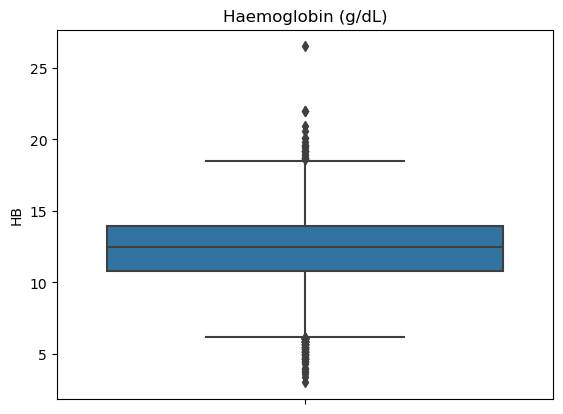

In [56]:
sns.boxplot(data = df_Admn, y = 'HB').set_title("Haemoglobin (g/dL)")

In [57]:
print(f"Number of outliers in HB : {count_outliers(df_Admn, 'HB')}")

Number of outliers in HB : 108


##### Checking outliers in TLC: TOTAL LEUKOCYTES COUNT (K per microliter)

Text(0.5, 1.0, 'TOTAL LEUKOCYTES COUNT (K per microliter)')

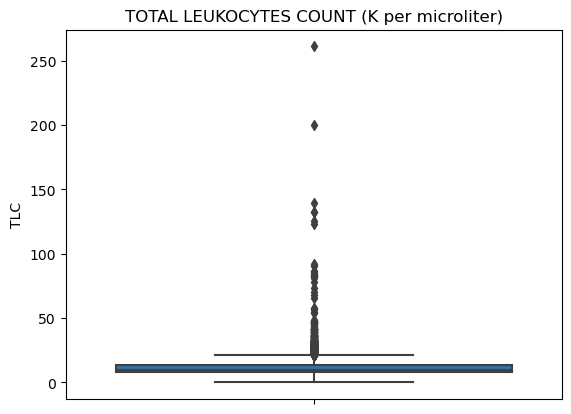

In [58]:
sns.boxplot(data = df_Admn, y = 'TLC').set_title("TOTAL LEUKOCYTES COUNT (K per microliter)")

In [59]:
print(f"Number of outliers in TLC : {count_outliers(df_Admn, 'TLC')}")

Number of outliers in TLC : 582


In [60]:
# Range of TLC in the dataset is 0.1 -261 K per microL; any value less than 1 K per microL is considered as an anomaly

df_Admn[ (df_Admn['TLC'] < 1) ].shape[0]

8

In [61]:
# Removing anomalies

df_Admn = df_Admn[ (df_Admn['TLC'] > 1) ]

##### Checking outliers in CREATININE (mg/dL or milligrams per deciliter)

Text(0.5, 1.0, 'CREATININE (mg/dL)')

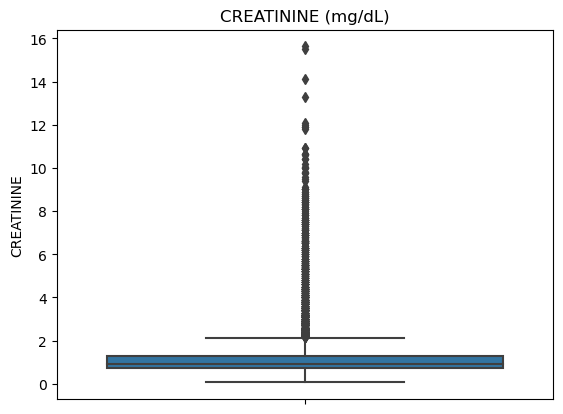

In [62]:
sns.boxplot(data = df_Admn, y = 'CREATININE').set_title("CREATININE (mg/dL)")

In [63]:
print(f"Number of outliers in CREATININE : {count_outliers(df_Admn, 'CREATININE')}")

Number of outliers in CREATININE : 1230


##### Checking outliers in EF: Ejection Fraction (%)

Text(0.5, 1.0, 'Ejection Fraction (%)')

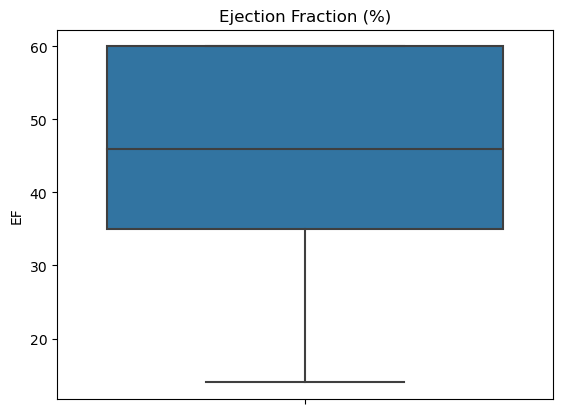

In [64]:
sns.boxplot(data = df_Admn, y = 'EF').set_title("Ejection Fraction (%)")

In [65]:
print(f"Number of outliers in EF : {count_outliers(df_Admn, 'EF')}")

Number of outliers in EF : 0


##### Checking outliers in GLUCOSE (mg/dL or milligrams per deciliter)

Text(0.5, 1.0, 'GLUCOSE (mg/dL)')

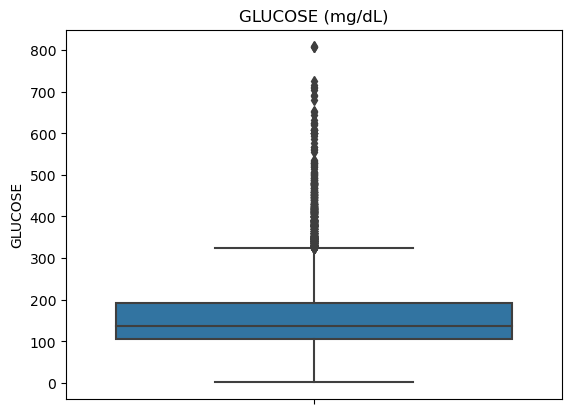

In [66]:
sns.boxplot(data = df_Admn, y = 'GLUCOSE').set_title("GLUCOSE (mg/dL)")

In [67]:
print(f"Number of outliers in GLUCOSE : {count_outliers(df_Admn, 'GLUCOSE')}")

Number of outliers in GLUCOSE : 566


##### Checking outliers in UREA (mg/dL or milligrams per deciliter)

Text(0.5, 1.0, 'UREA (mg/dL)')

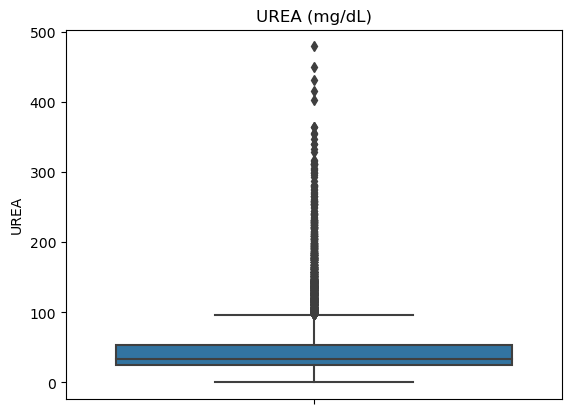

In [68]:
sns.boxplot(data = df_Admn, y = 'UREA').set_title("UREA (mg/dL)")

In [69]:
print(f"Number of outliers in UREA : {count_outliers(df_Admn, 'UREA')}")

Number of outliers in UREA : 1073


##### Checking outliers in PLATELETS (K per microliter)

Text(0.5, 1.0, 'PLATELETS (K per microliter)')

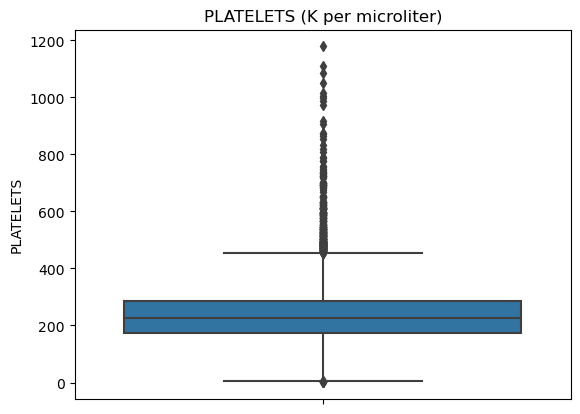

In [70]:
sns.boxplot(data = df_Admn, y = 'PLATELETS').set_title("PLATELETS (K per microliter)")

In [71]:
print(f"Number of outliers in PLATELETS : {count_outliers(df_Admn, 'PLATELETS')}")

Number of outliers in PLATELETS : 372


In [72]:
# Range of PLATELETS in the dataset is 0.58 -1179 K per microL; any value less than 10 K per microL is considered as an anomaly

df_Admn[ (df_Admn['PLATELETS'] < 10) ].shape[0]

12

In [73]:
# Removing anomalies

df_Admn = df_Admn[ (df_Admn['PLATELETS'] > 10) ]

In [74]:
df_Admn.reset_index(drop=True, inplace=True)

#### Checking normality of distribution of numeric variables

In [75]:
def test_normality_shapiro(ncol):
    
    # Normality test - Shapiro Wilk Test
    
    # Ho: data are normally distributed

    # H1: data are not normally distributed
    alpha = 0.05
    
    stat, p_value = shapiro(df_Admn[ncol])

    if p_value > alpha:
        #Fail to reject Null
        print(ncol, " is normally distributed with p_value : ",p_value, " greater than ",alpha)
    else:
        #Reject Null
        print(ncol, " is not normally distributed with p_value : ",p_value, " less than ",alpha)
    

In [76]:
def test_normality_JB(ncol):
    
    # Normality test - Jarque-Bera Test
    
    # Ho: data are normally distributed

    # H1: data are not normally distributed
    alpha = 0.05
    
    stat, p_value = jarque_bera(df_Admn[ncol])

    if p_value > alpha:
        #Fail to reject Null
        print(ncol, " is normally distributed with p_value : ",p_value, " greater than ",alpha)
    else:
        #Reject Null
        print(ncol, " is not normally distributed with p_value : ",p_value, " less than ",alpha)
    

In [77]:
cols = ['AGE','HB','TLC','CREATININE','EF','PLATELETS','GLUCOSE','UREA']

for i in cols:
    test_normality_shapiro(i)


AGE  is not normally distributed with p_value :  2.0270858250503016e-34  less than  0.05
HB  is not normally distributed with p_value :  2.7205490214567727e-23  less than  0.05
TLC  is not normally distributed with p_value :  0.0  less than  0.05
CREATININE  is not normally distributed with p_value :  0.0  less than  0.05
EF  is not normally distributed with p_value :  0.0  less than  0.05
PLATELETS  is not normally distributed with p_value :  0.0  less than  0.05
GLUCOSE  is not normally distributed with p_value :  0.0  less than  0.05
UREA  is not normally distributed with p_value :  0.0  less than  0.05


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [78]:
cols = ['AGE','HB','TLC','CREATININE','EF','PLATELETS','GLUCOSE','UREA']

for i in cols:
    test_normality_JB(i)


AGE  is not normally distributed with p_value :  1.5658842889778535e-165  less than  0.05
HB  is not normally distributed with p_value :  2.7189183490945195e-43  less than  0.05
TLC  is not normally distributed with p_value :  0.0  less than  0.05
CREATININE  is not normally distributed with p_value :  0.0  less than  0.05
EF  is not normally distributed with p_value :  4.44137118164732e-211  less than  0.05
PLATELETS  is not normally distributed with p_value :  0.0  less than  0.05
GLUCOSE  is not normally distributed with p_value :  0.0  less than  0.05
UREA  is not normally distributed with p_value :  0.0  less than  0.05


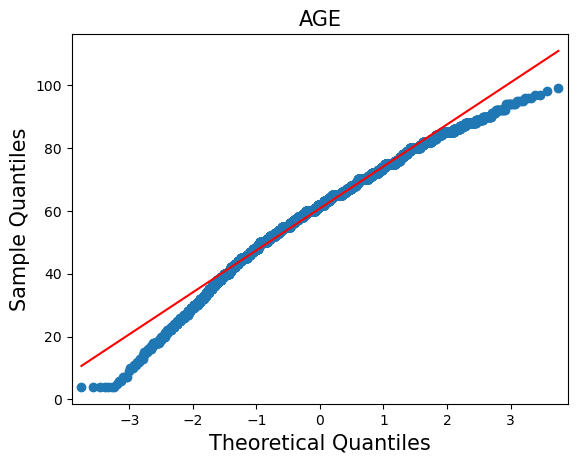

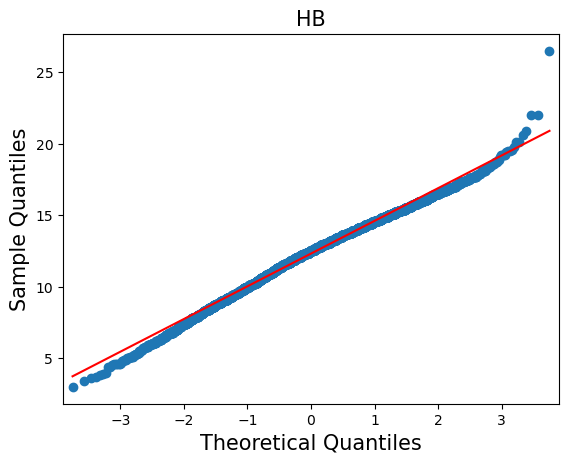

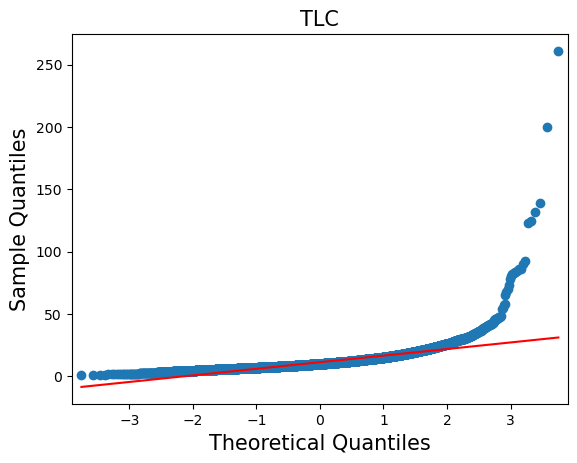

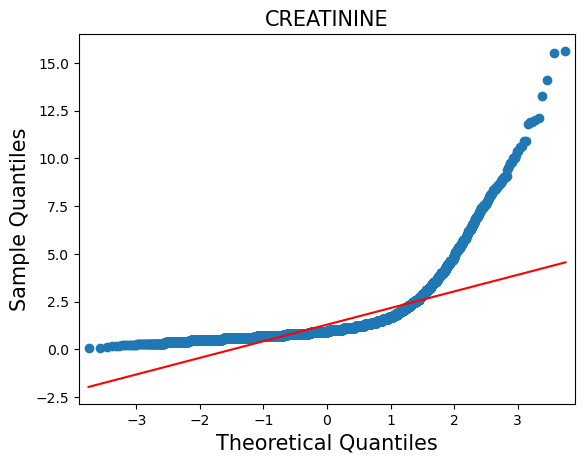

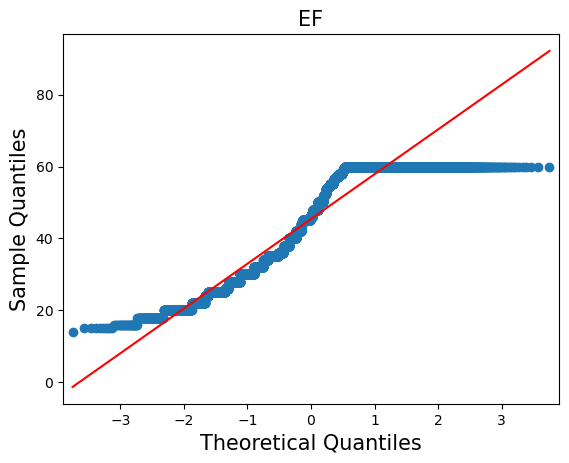

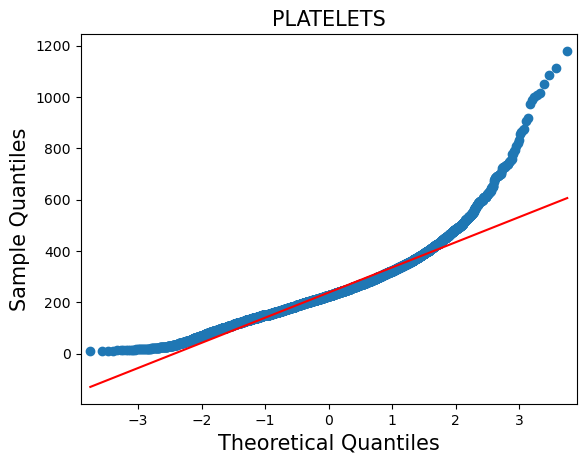

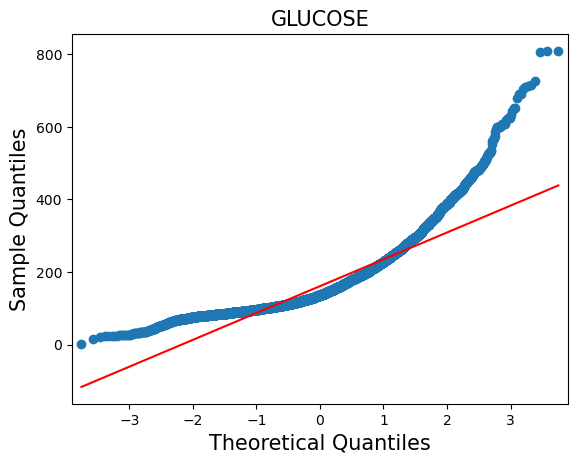

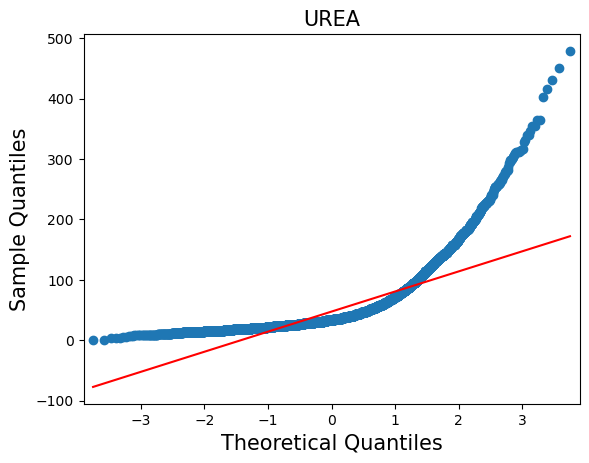

In [79]:
cols = ['AGE','HB','TLC','CREATININE','EF','PLATELETS','GLUCOSE','UREA']

for i in cols:
    
    # Q-Q Plot

    qqplot(df_Admn[i], line = 'r')

    # set plot and axes labels
    # set text size using 'fontsize'
    plt.title(i, fontsize = 15)
    plt.xlabel('Theoretical Quantiles', fontsize = 15)
    plt.ylabel('Sample Quantiles', fontsize = 15)

    # display the plot
    plt.show()

#### Hypothesis Test - Two Sample t-test (one categorical and one numerical, test of mean)

In [80]:
def tt_hypothesis(cat, ncol):
    
    # Normality test : sample size > 30
    # Assuming Normal
    
    cat_yes = df_Admn[ (df_Admn[cat] == 1) ][ncol]
    cat_no = df_Admn[ (df_Admn[cat] == 0) ][ncol]
    
    
    # Test of variance : levene test

    #H0 = pop_var_cat_yes = pop_var_cat_no
    #H1 = pop_var_cat_yes != pop_var_cat_no
    
    statistic,pvalue = st.levene(cat_yes,cat_no)
    
    # Level of significance , alpha = 0.05   (5%)
    alpha = 0.05
    if(pvalue > alpha):
        
        # equal variance true, fail to reject null
        ev = 'True'
        
    else:
        # equal variance false, reject null
        ev = 'False'
     
    # two sample t-test
    
    # H0 : No relationship between ncol and categorical var
    # mu_cat_yes = mu_cat_no
    # H1 : there is relationship between ncol and categorical var
    # mu_cat_yes != mu_cat_no
    
    tstat, pvalue = st.ttest_ind(cat_yes,cat_no,equal_var = ev)
    
    if pvalue > alpha:
        #Fail to reject Null
        print(ncol, " is not related to ", cat)
    else:
        #Reject Null
        print(ncol, " is related to ", cat)

#### Checking if numerical variables are related to HEART FAILURE

In [81]:
cols = ['AGE','HB','TLC','PLATELETS','GLUCOSE','UREA','CREATININE','EF']

for i in cols:
    tt_hypothesis("HEART FAILURE",i)

AGE  is related to  HEART FAILURE
HB  is related to  HEART FAILURE
TLC  is related to  HEART FAILURE
PLATELETS  is not related to  HEART FAILURE
GLUCOSE  is related to  HEART FAILURE
UREA  is related to  HEART FAILURE
CREATININE  is related to  HEART FAILURE
EF  is related to  HEART FAILURE


#### Dropping insignificant numerical variables

In [82]:
df_Admn = df_Admn.drop(['PLATELETS'], axis = 1)

In [83]:
df_Admn.shape

(11459, 44)

#### Scaling of numerical features

In [84]:
df_Admn_num = df_Admn[['AGE','HB','TLC','CREATININE','EF','GLUCOSE','UREA']]

In [85]:
# initialize the Robust Scalar
X_scaler = RobustScaler()

# scale all the numerical columns
num_scaled = X_scaler.fit_transform(df_Admn_num)

# create a dataframe of scaled numerical variables
df_num_scaled = pd.DataFrame(num_scaled, columns = df_Admn_num.columns)

<IPython.core.display.Javascript object>

In [86]:
df_Admn[['AGE','HB','TLC','CREATININE','EF','GLUCOSE','UREA']] = df_num_scaled

In [87]:
df_Admn.head()

,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,AGE,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,M,R,E,1.117647,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.967742,1.150943,-0.655172,0.000000,-0.053571,1.0,-0.44,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,R,E,0.176471,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.387097,-0.188679,-0.287356,-0.571429,-0.053571,0.0,-0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,U,E,0.294118,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.096774,-0.018868,-0.080460,-0.250000,-0.589286,0.0,-0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,U,E,-0.117647,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.354839,-0.169811,0.080460,0.750000,0.571429,0.0,-1.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,U,E,-0.882353,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.032258,-0.094340,0.252874,-0.142857,0.125000,0.0,-0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####  Correlation Analysis

In [88]:
df_Admn_num = df_Admn.select_dtypes(include = 'number')

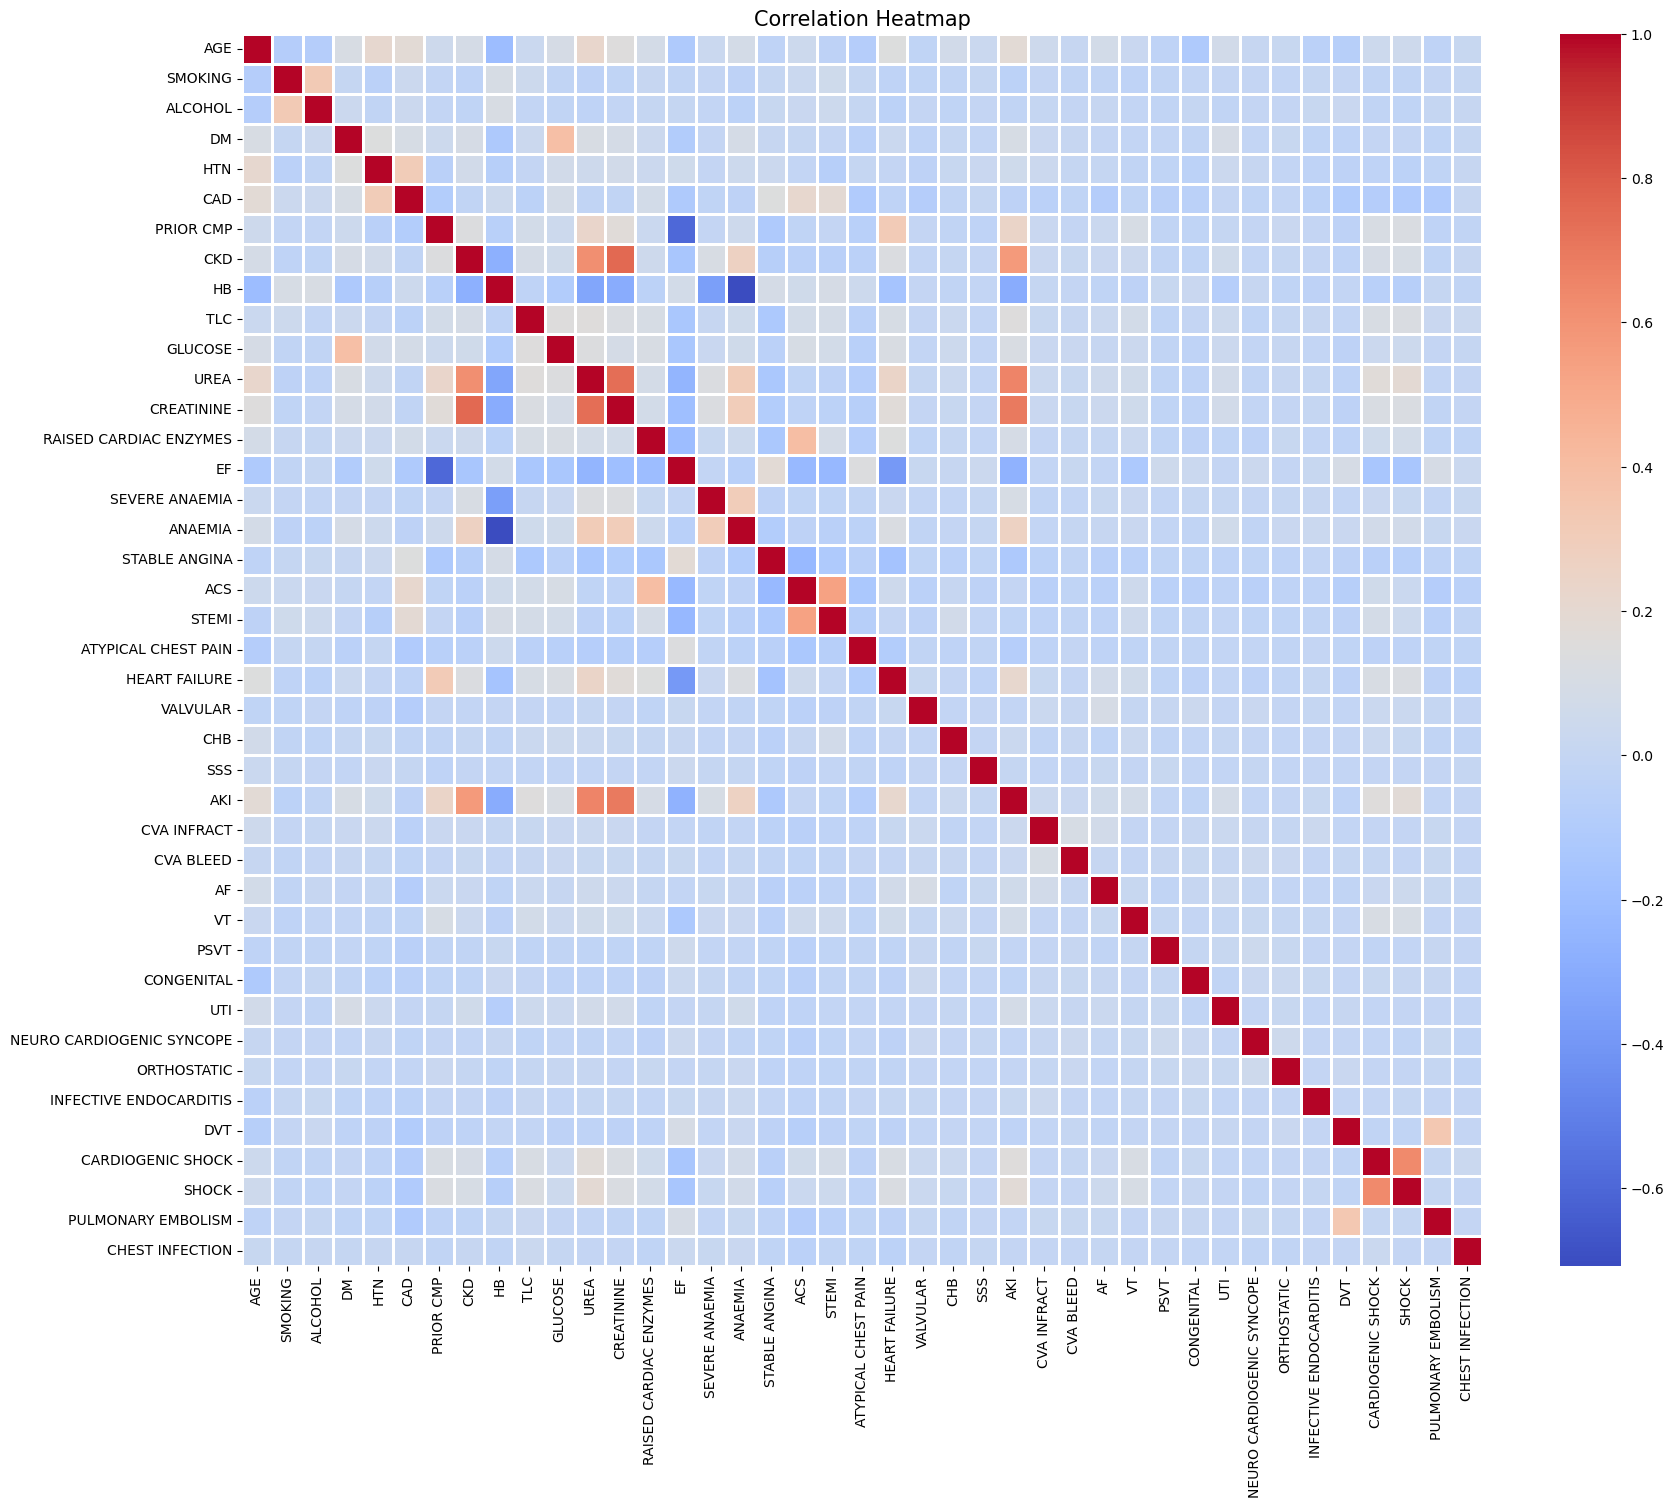

In [89]:
# correlation between all numerical variables
correlation_matrix = df_Admn_num.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

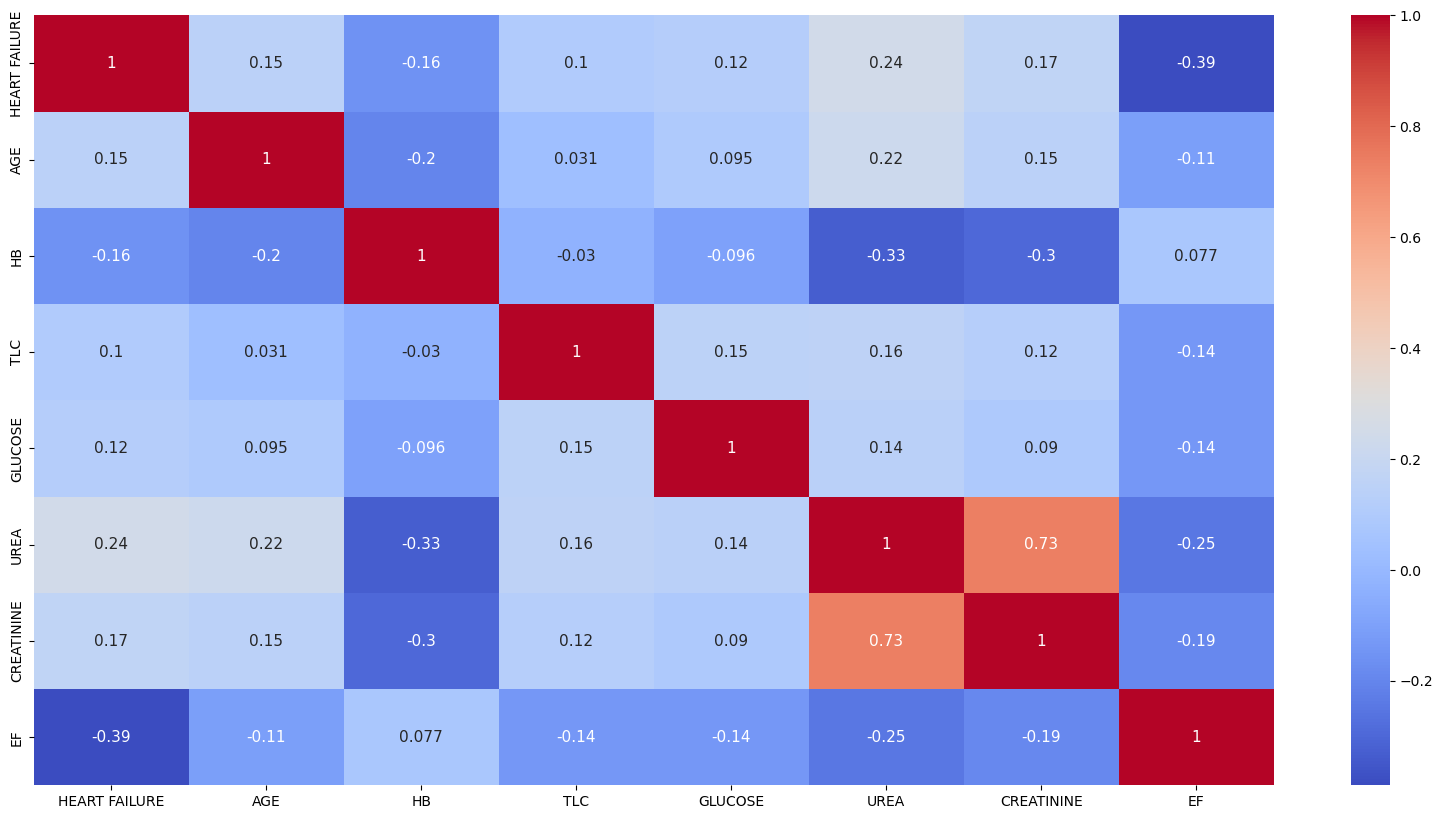

In [90]:
# correlation between heart failure and age and lab parameters
plt.figure(figsize = (20,10))

sns.heatmap(df_Admn_num.loc[:,['HEART FAILURE','AGE','HB','TLC','GLUCOSE','UREA','CREATININE','EF'
                               ]].corr(), annot = True,  cmap='coolwarm',annot_kws = {"size": 11})

plt.show()

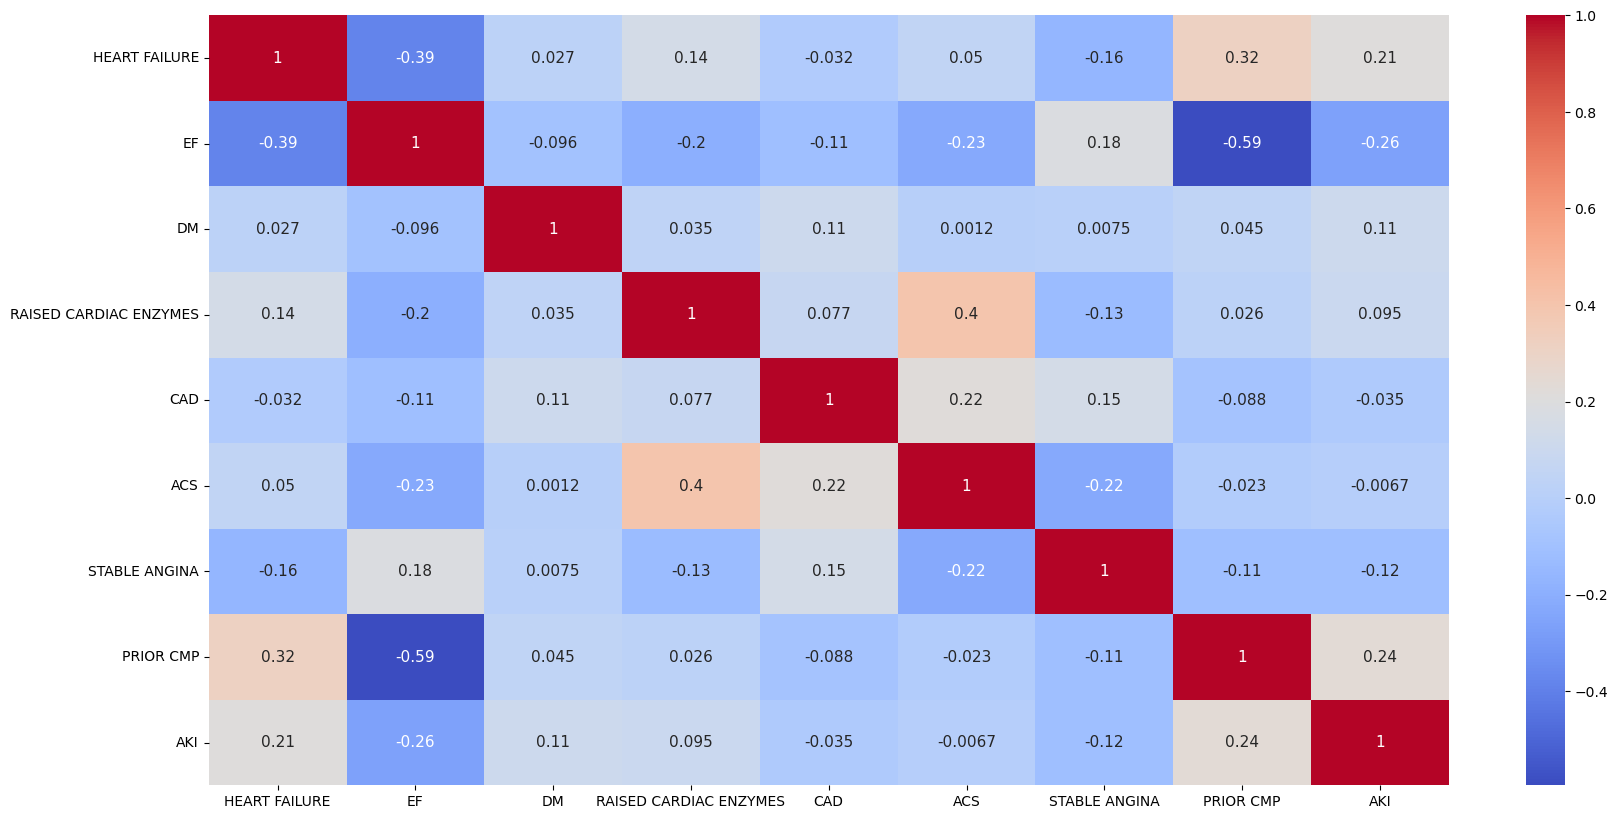

In [91]:
# correlation between heart failure and other comorbodities
plt.figure(figsize = (20,10))

sns.heatmap(df_Admn_num.loc[:,['HEART FAILURE','EF','DM','RAISED CARDIAC ENZYMES','CAD','ACS','STABLE ANGINA','PRIOR CMP',
                               'AKI']].corr(), annot = True,  cmap='coolwarm',annot_kws = {"size": 11})

plt.show()

#### Checking  Variance Inflation Factor of numerical variables

In [92]:
# checking multicollinearity between numeric independent variables

In [93]:
df_vif = df_Admn.select_dtypes(include = 'number')

In [94]:
# excluding HEART FAILURE as it is the dependent variable

df_vif = df_vif.drop(['HEART FAILURE'], axis = 1)

In [95]:
vif = pd.DataFrame()


vif["VIF_Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]


vif["Features"] = df_vif.columns


vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,3.992049,CREATININE
1,3.112702,CAD
2,2.909787,UREA
3,2.801298,ACS
4,2.771841,AKI
5,2.674440,CKD
6,2.419749,ANAEMIA
7,2.309259,HB
8,2.206465,HTN
9,1.860511,EF


In [96]:
# VIF for all numeric values are less than 5. Hence not removing any variables.

#### Converting datatype of all variables that are not continuous numeric to categorical type - as their values are binary class

In [97]:
for i in df_Admn.columns:
    if i not in ['AGE','HB','TLC','CREATININE','EF','GLUCOSE','UREA']:
        df_Admn[i] = df_Admn[i].astype('category')

#### Feature selection of categorical variables using Chi Square Test - test of association with HEART FAILURE

In [98]:
df_Admn_cat = df_Admn.select_dtypes(include = 'category')

In [99]:
df_Admn_cat.columns

Index(['GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'SMOKING',
       'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD',
       'RAISED CARDIAC ENZYMES', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA',
       'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [100]:
# H0 : No relationship between independent categorical variable  and HEART FAILURE
# H1 : There is relationship between independent categorical variable  and HEART FAILURE

cols  = [i for i in df_Admn_cat.columns]
cols.remove('HEART FAILURE')

for i in cols:
    statistic, pvalue, dof, expected_freq =  st.chi2_contingency(pd.crosstab(df_Admn_cat['HEART FAILURE'],df_Admn_cat[i]),correction=False)
    print("P-value for ",i," : ", pvalue)
    

P-value for  GENDER  :  0.00017731486219175983
P-value for  RURAL  :  0.8140806437004786
P-value for  TYPE OF ADMISSION-EMERGENCY/OPD  :  5.6820831262470394e-80
P-value for  SMOKING  :  0.0006257004315353159
P-value for  ALCOHOL  :  2.567586379325808e-06
P-value for  DM  :  0.00446206572103538
P-value for  HTN  :  0.9364489038511279
P-value for  CAD  :  0.0006941309704530842
P-value for  PRIOR CMP  :  6.557054454307105e-253
P-value for  CKD  :  1.5823256925980593e-41
P-value for  RAISED CARDIAC ENZYMES  :  3.6657766152129587e-54
P-value for  SEVERE ANAEMIA  :  0.006426943568589779
P-value for  ANAEMIA  :  8.171989596742708e-39
P-value for  STABLE ANGINA  :  6.993376935602422e-68
P-value for  ACS  :  8.906416997870433e-08
P-value for  STEMI  :  0.6072525309018132
P-value for  ATYPICAL CHEST PAIN  :  1.2858227122906738e-22
P-value for  VALVULAR  :  0.1343682823041737
P-value for  CHB  :  0.6298005817012594
P-value for  SSS  :  0.00033570228158592673
P-value for  AKI  :  3.674997779328934

#### Identifying and dropping insignificant categorical variables based on Chi Square test

In [101]:
# From above chi square test, significant variables have p-value < 0.05  (alpha is 5%)

# Insignificant categorical variables have p-value > 0.05
for i in cols:
    statistic, pvalue, dof, expected_freq =  st.chi2_contingency(pd.crosstab(df_Admn_cat['HEART FAILURE'],df_Admn_cat[i]),correction=False)
    if pvalue > 0.05 :
        df_Admn = df_Admn.drop(i, axis = 1)
        print("Dropping ",i)

Dropping  RURAL
Dropping  HTN
Dropping  STEMI
Dropping  VALVULAR
Dropping  CHB
Dropping  CVA INFRACT
Dropping  CVA BLEED
Dropping  UTI
Dropping  ORTHOSTATIC
Dropping  INFECTIVE ENDOCARDITIS


### Building Machine Learning Models to predict HEART FAILURE at the time of admission to hospital

In [102]:
# Converting 'HEART FAILURE' to numeric

df_Admn['HEART FAILURE']=df_Admn['HEART FAILURE'].astype('int64')

In [103]:
df_Admn['HEART FAILURE'].value_counts()

HEART FAILURE
0    8407
1    3052
Name: count, dtype: int64

In [104]:
df_target = df_Admn['HEART FAILURE']

df_feature = df_Admn.drop('HEART FAILURE', axis = 1)


In [105]:
df_Admn_num = df_feature.select_dtypes(include = 'number')

#### Encoding categorical variables

In [106]:
df_Admn_cat = df_feature.select_dtypes(include = 'category')

In [107]:
df_Admn_cat

,GENDER,TYPE OF ADMISSION-EMERGENCY/OPD,SMOKING,ALCOHOL,DM,CAD,PRIOR CMP,CKD,RAISED CARDIAC ENZYMES,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,ATYPICAL CHEST PAIN,SSS,AKI,AF,VT,PSVT,CONGENITAL,NEURO CARDIOGENIC SYNCOPE,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,M,E,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,E,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,E,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,E,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,E,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11454,F,E,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11455,F,O,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11456,M,E,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11457,M,E,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
dummy_var = pd.get_dummies(data = df_Admn_cat, dtype='int', drop_first = True)

In [109]:
X = pd.concat([df_Admn_num, dummy_var], axis = 1)

In [110]:
X_const = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_const, df_target, random_state = 42, test_size = 0.3, stratify=df_target)


print('X_train', X_train.shape)
print('y_train', y_train.shape)


print('X_test', X_test.shape)
print('y_test', y_test.shape)

<IPython.core.display.Javascript object>

X_train (8021, 34)
y_train (8021,)
X_test (3438, 34)
y_test (3438,)


In [112]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    train_pred = model.predict(X_train)

    return(classification_report(y_train, train_pred))

In [113]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    test_pred = model.predict(X_test)

    return(classification_report(y_test, test_pred))

In [114]:
def plot_confusion_matrix_test(model):
    test_pred = model.predict(X_test)
    
    
    cm = confusion_matrix(y_test, test_pred)

   
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

   
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

   
    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

In [115]:
# Receiver Operating Characterictic - Area Under Curve - test set
def plot_roc_test(model):
    test_pred = model.predict(X_test)
    
   
    fpr, tpr, thresholds = roc_curve(y_test, test_pred)

    
    plt.plot(fpr, tpr)

   
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    
    plt.plot([0, 1], [0, 1],'r--')

    
    plt.title('ROC curve for Test Data', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, test_pred),4)))

    
    plt.grid(True)
    plt.show()

In [116]:
# Receiver Operating Characterictic - Area Under Curve - train set
def plot_roc_train(model): 
    train_pred = model.predict(X_train)
    
   
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)

    
    plt.plot(fpr, tpr)

   
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    
    plt.plot([0, 1], [0, 1],'r--')

    
    plt.title('ROC curve for Train Data', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(metrics.roc_auc_score(y_train, train_pred),4)))

    
    plt.grid(True)
    plt.show()

In [117]:
def display_imp_features(model):
    important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': model.feature_importances_})

    # sort the dataframe in the descending order according to the feature importance
    important_features = important_features.sort_values('Importance', ascending = False)
    important_features=important_features.head(20)
    # create a barplot to visualize the features based on their importance
    sns.barplot(x = 'Importance', y = 'Features', data = important_features)

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('Feature Importance', fontsize = 15)
    plt.xlabel('Importance', fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

    # display the plot
    plt.show()

In [118]:
def imp_features(model):
    important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': model.feature_importances_})

    # sort the dataframe in the descending order according to the feature importance
    important_features = important_features.sort_values('Importance', ascending = False)
    return important_features

### Logistic Regression

In [119]:
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.456953
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7987
Method:                           MLE   Df Model:                           33
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2115
Time:                        23:50:16   Log-Likelihood:                -3665.2
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8005      0.079    -10

In [120]:
X_train = X_train.drop(['ANAEMIA_1.0'], axis=1)


X_test = X_test.drop(['ANAEMIA_1.0'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())


<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.456953
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           32
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2115
Time:                        23:50:17   Log-Likelihood:                -3665.2
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8016      0.078    -10

In [121]:
X_train = X_train.drop(['ALCOHOL_1.0'], axis=1)


X_test = X_test.drop(['ALCOHOL_1.0'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())


<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.456958
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           31
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2115
Time:                        23:50:17   Log-Likelihood:                -3665.3
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8011      0.078    -10

In [122]:
X_train = X_train.drop(['SHOCK_1.0'], axis=1)


X_test = X_test.drop(['SHOCK_1.0'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())


<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.456968
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7990
Method:                           MLE   Df Model:                           30
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2115
Time:                        23:50:17   Log-Likelihood:                -3665.3
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8033      0.078    -10

In [123]:
X_train = X_train.drop(['VT_1.0'], axis=1)


X_test = X_test.drop(['VT_1.0'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())


<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.456981
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7991
Method:                           MLE   Df Model:                           29
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2115
Time:                        23:50:17   Log-Likelihood:                -3665.4
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8049      0.078    -10

In [124]:
X_train = X_train.drop(['AKI_1.0'], axis=1)


X_test = X_test.drop(['AKI_1.0'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())


<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.456998
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7992
Method:                           MLE   Df Model:                           28
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2115
Time:                        23:50:17   Log-Likelihood:                -3665.6
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8007      0.078    -10

In [125]:
X_train = X_train.drop(['PSVT_1.0'], axis=1)


X_test = X_test.drop(['PSVT_1.0'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())


<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.457017
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7993
Method:                           MLE   Df Model:                           27
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2114
Time:                        23:50:17   Log-Likelihood:                -3665.7
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8038      0.077    -10

In [126]:
X_train = X_train.drop(['CARDIOGENIC SHOCK_1.0'], axis=1)


X_test = X_test.drop(['CARDIOGENIC SHOCK_1.0'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())


<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.457054
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7994
Method:                           MLE   Df Model:                           26
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2114
Time:                        23:50:17   Log-Likelihood:                -3666.0
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.7976      0.077    -10

In [127]:
X_train = X_train.drop(['CREATININE'], axis=1)


X_test = X_test.drop(['CREATININE'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())


<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.457098
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7995
Method:                           MLE   Df Model:                           25
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2113
Time:                        23:50:17   Log-Likelihood:                -3666.4
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.7952      0.077    -10

In [128]:
X_train = X_train.drop(['DVT_1.0'], axis=1)


X_test = X_test.drop(['DVT_1.0'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())


<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.457146
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7996
Method:                           MLE   Df Model:                           24
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2112
Time:                        23:50:17   Log-Likelihood:                -3666.8
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8005      0.077    -10

In [129]:
X_train = X_train.drop(['SMOKING_1.0'], axis=1)


X_test = X_test.drop(['SMOKING_1.0'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())


<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.457194
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7997
Method:                           MLE   Df Model:                           23
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2111
Time:                        23:50:17   Log-Likelihood:                -3667.2
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.8004      0.077    -10

In [130]:
X_train = X_train.drop(['CKD_1.0'], axis=1)


X_test = X_test.drop(['CKD_1.0'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())


<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.457360
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7998
Method:                           MLE   Df Model:                           22
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2108
Time:                        23:50:18   Log-Likelihood:                -3668.5
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.7996      0.077    -10

In [131]:
X_train = X_train.drop(['TLC'], axis=1)


X_test = X_test.drop(['TLC'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.457536
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     7999
Method:                           MLE   Df Model:                           21
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2105
Time:                        23:50:18   Log-Likelihood:                -3669.9
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.7831      0.076    -10

In [132]:
X_train = X_train.drop(['CONGENITAL_1.0'], axis=1)


X_test = X_test.drop(['CONGENITAL_1.0'], axis=1)

logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

<IPython.core.display.Javascript object>

Optimization terminated successfully.
         Current function value: 0.457777
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          HEART FAILURE   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     8000
Method:                           MLE   Df Model:                           20
Date:                Tue, 17 Sep 2024   Pseudo R-squ.:                  0.2101
Time:                        23:50:18   Log-Likelihood:                -3671.8
converged:                       True   LL-Null:                       -4648.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.7951      0.076    -10

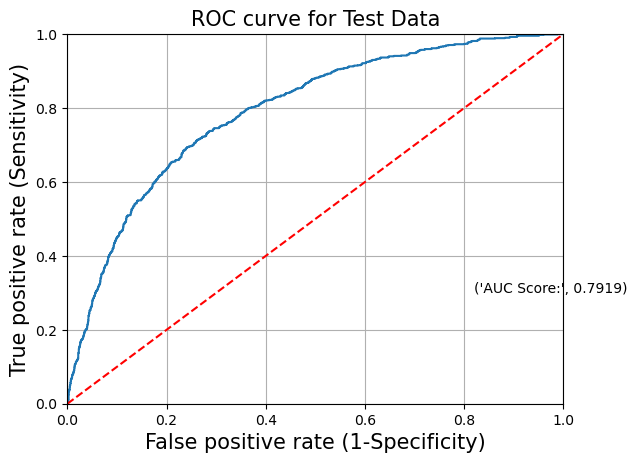

In [133]:
# ROC for test data for the model with best parameters

plot_roc_test(logreg)

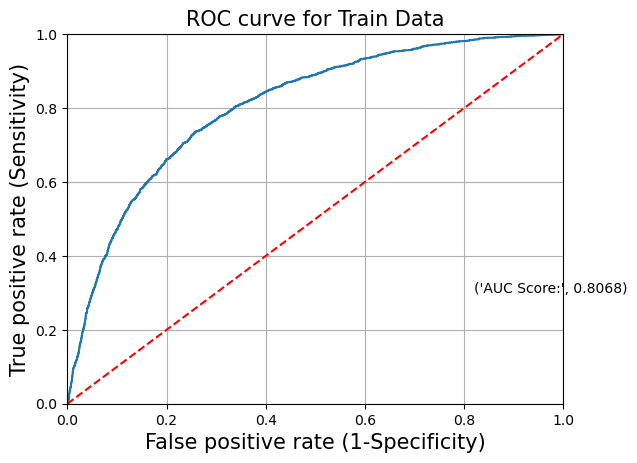

In [134]:
#ROC for train data for the model with best parameters


plot_roc_train(logreg)

In [135]:
test_pred_prob = logreg.predict(X_test)
test_pred = [ 0 if x < 0.5 else 1 for x in test_pred_prob]

#### Confusion Matrix for test data

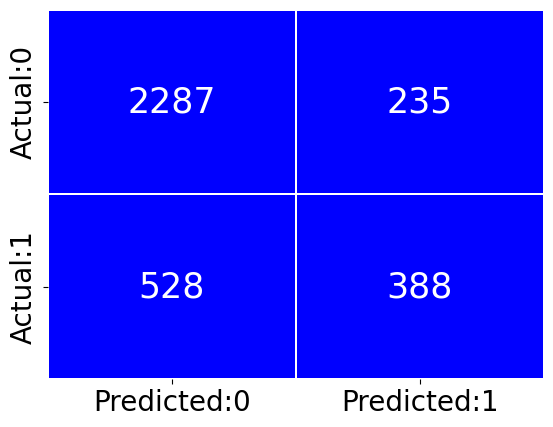

In [136]:
cm = confusion_matrix(y_test, test_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['blue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

#### Performance measures for test set

In [137]:
acc_table = classification_report(y_test, test_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2522
           1       0.62      0.42      0.50       916

    accuracy                           0.78      3438
   macro avg       0.72      0.67      0.68      3438
weighted avg       0.76      0.78      0.76      3438



In [138]:
train_pred_prob = logreg.predict(X_train)
train_pred = [ 0 if x < 0.5 else 1 for x in train_pred_prob]

#### Performance measures for train set

In [139]:
acc_table = classification_report(y_train, train_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      5885
           1       0.65      0.41      0.50      2136

    accuracy                           0.78      8021
   macro avg       0.73      0.67      0.68      8021
weighted avg       0.77      0.78      0.77      8021



### XGBoost Model

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 42, test_size = 0.3, stratify=df_target)


print('X_train', X_train.shape)
print('y_train', y_train.shape)


print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (8021, 33)
y_train (8021,)
X_test (3438, 33)
y_test (3438,)


In [180]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1,random_state = 10)

xgb_model = xgb_model.fit(X_train, y_train)

In [181]:
# Performance measures for train ad test sets

print('Classification Report for train set:\n', get_train_report(xgb_model))


print('Classification Report for test set:\n', get_test_report(xgb_model))


Classification Report for train set:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5885
           1       0.93      0.80      0.86      2136

    accuracy                           0.93      8021
   macro avg       0.93      0.89      0.91      8021
weighted avg       0.93      0.93      0.93      8021

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2522
           1       0.61      0.48      0.54       916

    accuracy                           0.78      3438
   macro avg       0.72      0.68      0.70      3438
weighted avg       0.77      0.78      0.77      3438



#### Tuning Hyperparameters using GridSearchCV

In [182]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                     'max_depth': range(5,15),
                     'gamma': [0, 1, 2, 3, 4, 5, 6],
                     'min_child_weight':[0, 1, 2, 3, 4, 5],
                     'n_estimators': [10, 15, 20]}
        
xgb_model = XGBClassifier(random_state = 10)

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, n_jobs = -1, scoring = 'roc_auc')


xgb_grid_model = xgb_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid_model.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 4, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 20} 



#### Build model using hypertuned parameters

In [183]:
xgb_model = XGBClassifier(learning_rate = xgb_grid_model.best_params_.get('learning_rate'),
                                max_depth = xgb_grid_model.best_params_.get('max_depth'),
                              gamma = xgb_grid_model.best_params_.get('gamma'),
                              min_child_weight = xgb_grid_model.best_params_.get('min_child_weight'),
                              n_estimators = xgb_grid_model.best_params_.get('n_estimators'),
                              random_state = 10)

xgb_model = xgb_model.fit(X_train, y_train)

In [146]:
# to build model directly using hypertuned parameters from the GridSearchCV

xgb_model = XGBClassifier(gamma = 4, learning_rate = 0.2, max_depth =5, min_child_weight = 4, n_estimators = 20, random_state = 10)


xgb_model = xgb_model.fit(X_train, y_train)

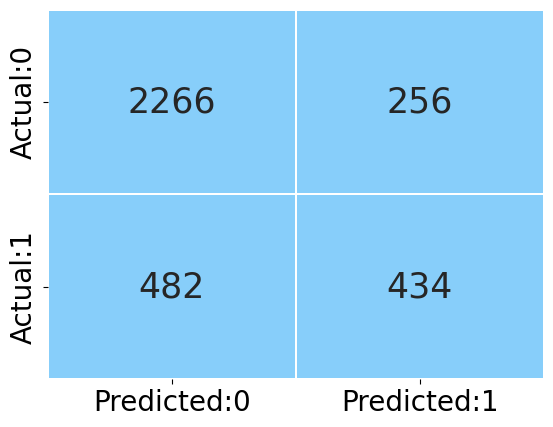

In [184]:
plot_confusion_matrix_test(xgb_model)

In [185]:
# Performance measures for train ad test sets for the model with best parameters

print('Classification Report for train set:\n', get_train_report(xgb_model))


print('Classification Report for test set:\n', get_test_report(xgb_model))


Classification Report for train set:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      5885
           1       0.69      0.49      0.57      2136

    accuracy                           0.81      8021
   macro avg       0.76      0.71      0.72      8021
weighted avg       0.79      0.81      0.79      8021

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      2522
           1       0.63      0.47      0.54       916

    accuracy                           0.79      3438
   macro avg       0.73      0.69      0.70      3438
weighted avg       0.77      0.79      0.77      3438



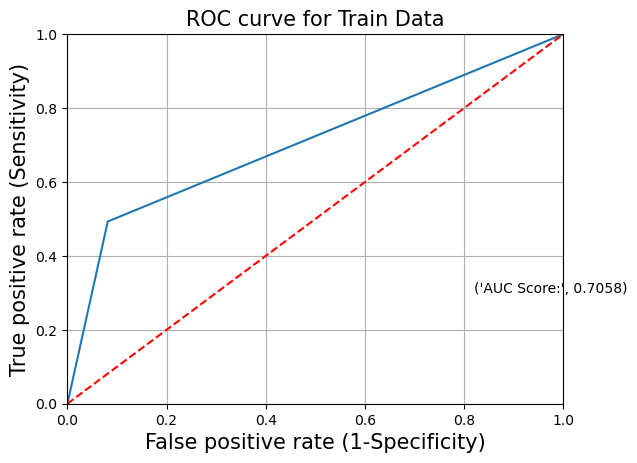

In [186]:
plot_roc_train(xgb_model)

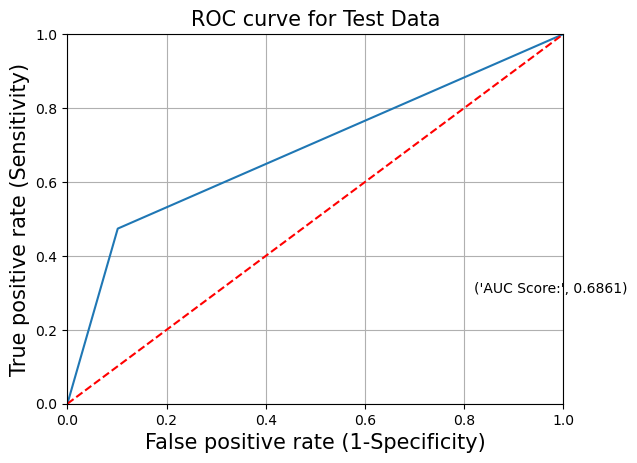

In [187]:
plot_roc_test(xgb_model)

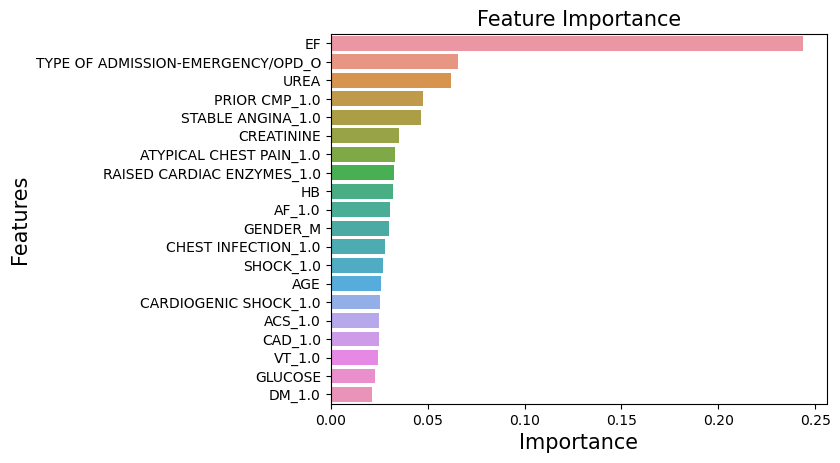

In [188]:
# Important features

display_imp_features(xgb_model)

In [189]:
imp_features(xgb_model)

,Features,Importance
6,EF,0.243633
8,TYPE OF ADMISSION-EMERGENCY/OPD_O,0.065876
4,UREA,0.062229
13,PRIOR CMP_1.0,0.047602
18,STABLE ANGINA_1.0,0.046462
5,CREATININE,0.035135
20,ATYPICAL CHEST PAIN_1.0,0.033399
15,RAISED CARDIAC ENZYMES_1.0,0.032569
1,HB,0.032005
23,AF_1.0,0.030351


### Artificial Neural Network(ANN) Model

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 42, test_size = 0.3, stratify=df_target)


print('X_train', X_train.shape)
print('y_train', y_train.shape)


print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (8021, 33)
y_train (8021,)
X_test (3438, 33)
y_test (3438,)


#### Training ANN model with all features

In [159]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
# Input layer + first hidden layer
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))  # Dropout layer with 50% rate
# Second hidden layer
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))  # Dropout layer with 50% rate
# Third hidden layer
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))  # Dropout layer with 50% rate
# Fourth hidden layer
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.01))
# Output layer for binary classification (heart failure)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


C:\Users\arun_\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\arun_\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5606 - loss: 0.6865 - val_accuracy: 0.7336 - val_loss: 0.4927
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7307 - loss: 0.5219 - val_accuracy: 0.7336 - val_loss: 0.4784
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7396 - loss: 0.5007 - val_accuracy: 0.7368 - val_loss: 0.4732
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7618 - loss: 0.4875 - val_accuracy: 0.7691 - val_loss: 0.4690
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7684 - loss: 0.4831 - val_accuracy: 0.7801 - val_loss: 0.4691
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.4745 - val_accuracy: 0.7798 - val_loss: 0.4647
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.4724 - val_accuracy: 0.7792 - val_loss: 0.4643
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7749 - loss: 0.4713 - val_accu

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - loss: 0.4253 - val_accuracy: 0.7836 - val_loss: 0.4545
Epoch 52/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8023 - loss: 0.4183 - val_accuracy: 0.7816 - val_loss: 0.4552
Epoch 53/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8043 - loss: 0.4247 - val_accuracy: 0.7827 - val_loss: 0.4552
Epoch 54/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8053 - loss: 0.4182 - val_accuracy: 0.7830 - val_loss: 0.4553
Epoch 55/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8069 - loss: 0.4181 - val_accuracy: 0.7830 - val_loss: 0.4558
Epoch 56/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8076 - loss: 0.4173 - val_accuracy: 0.7801 - val_loss: 0.4570
Epoch 57/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8059 - loss: 0.4140 - val_accuracy: 0.7798 - val_loss: 0.4582
Epoch 58/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8017 - loss: 0.4215 - val_accuracy:

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7661 - loss: 0.4747
Test Accuracy: 0.7763234376907349
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2522
           1       0.59      0.52      0.55       916

    accuracy                           0.78      3438
   macro avg       0.71      0.69      0.70      3438
weighted avg       0.77      0.78      0.77      3438



In [160]:
# Predictions for Train Data
y_pred_train = (model.predict(X_train) > 0.5).astype("int32")
print("Classification Report for Train Data:")
print(classification_report(y_train, y_pred_train))

# Predictions for Test Data
y_pred_test = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test))


251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5885
           1       0.73      0.64      0.68      2136

    accuracy                           0.84      8021
   macro avg       0.80      0.78      0.79      8021
weighted avg       0.84      0.84      0.84      8021

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2522
           1       0.59      0.52      0.55       916

    accuracy                           0.78      3438
   macro avg       0.71      0.69      0.70      3438
weighted avg       0.77      0.78      0.77      3438



108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


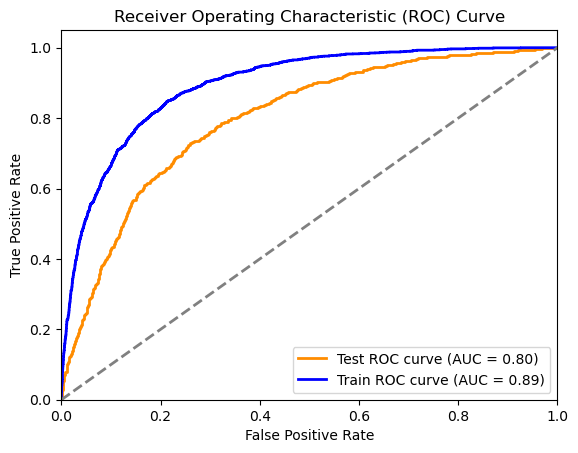

In [161]:
# ROC curve and AUC for Test Data
y_pred_proba_test = model.predict(X_test).ravel()
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# ROC curve and AUC for Train Data
y_pred_proba_train = model.predict(X_train).ravel()
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curves
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


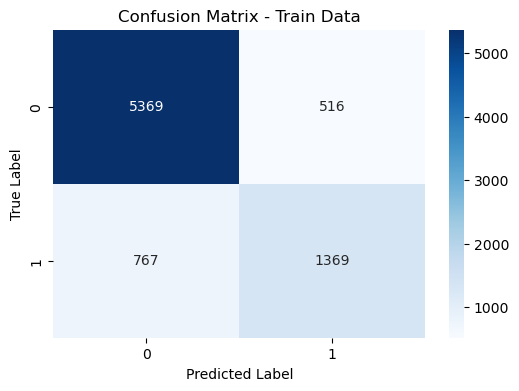

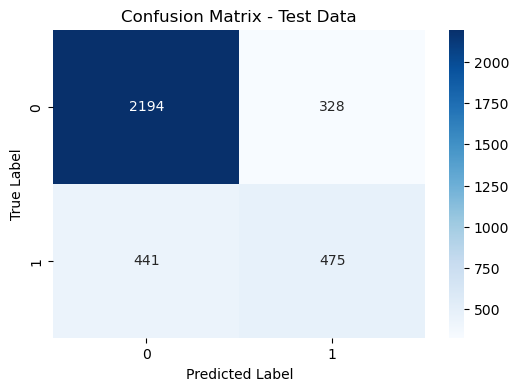

In [162]:
# Confusion Matrix for Train Data
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Test Data
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


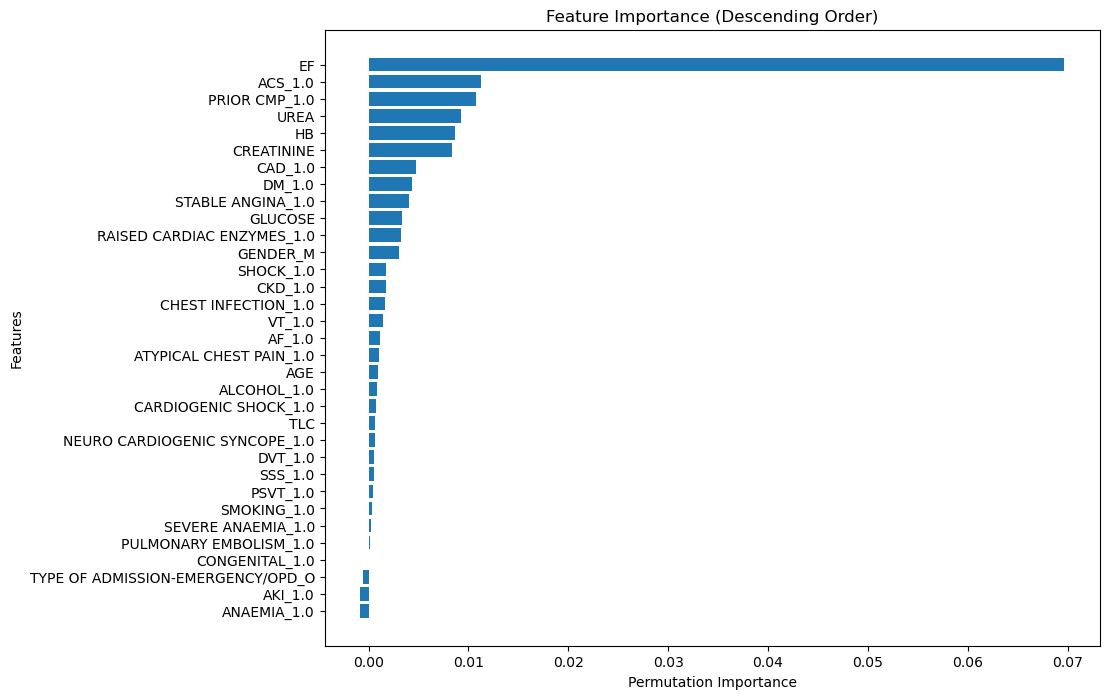

In [163]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)  # If your model has any TensorFlow components affecting randomness

# Custom scoring function for accuracy
def keras_predict_score(model, X, y):
    y_pred = (model.predict(X) > 0.5).astype("int32")
    return accuracy_score(y, y_pred)

# Perform permutation importance
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42,
    scoring=keras_predict_score
)

# Get the importance scores and feature names
importance_scores = result.importances_mean

# Arrange features in descending order of importance
if isinstance(X_test, pd.DataFrame):
    features = X_test.columns
else:
    features = np.arange(X_test.shape[1])

sorted_idx = np.argsort(importance_scores)[::-1]
sorted_features = features[sorted_idx]
sorted_importance_scores = importance_scores[sorted_idx]

# Visualize the feature importance
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importance_scores)
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Descending Order)")
plt.gca().invert_yaxis()  # To show the most important features on top
plt.show()

In [170]:
# Extracting the most significant 9 features from the permutation importance results
top_9_features = sorted_features[:9]

# Displaying the top 9 features
print("Top 9 Features:", top_9_features)

Top 9 Features: Index(['EF', 'ACS_1.0', 'PRIOR CMP_1.0', 'UREA', 'HB', 'CREATININE', 'CAD_1.0',
       'DM_1.0', 'STABLE ANGINA_1.0'],
      dtype='object')


#### Training model with top 9 features based on importance score

In [171]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Selecting only the top 9 features using .loc
X_train_final = X_train.loc[:, top_9_features]
X_test_final = X_test.loc[:, top_9_features]

# Define the model architecture
model = Sequential()
# Input layer + first hidden layer
model.add(Dense(128, input_dim=X_train_final.shape[1]))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))  # Dropout layer with 50% rate
# Second hidden layer
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))  # Dropout layer with 50% rate
# Third hidden layer
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))  # Dropout layer with 50% rate
# Fourth hidden layer
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.01))
# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_final, y_train, epochs=100, batch_size=64, validation_data=(X_test_final, y_test))


C:\Users\arun_\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\arun_\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6777 - loss: 0.6414 - val_accuracy: 0.7324 - val_loss: 0.4867
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7360 - loss: 0.5142 - val_accuracy: 0.7702 - val_loss: 0.4808
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7564 - loss: 0.5042 - val_accuracy: 0.7752 - val_loss: 0.4758
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7614 - loss: 0.4997 - val_accuracy: 0.7661 - val_loss: 0.4752
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7669 - loss: 0.4934 - val_accuracy: 0.7740 - val_loss: 0.4748
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7586 - loss: 0.4976 - val_accuracy: 0.7760 - val_loss: 0.4745
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7659 - loss: 0.4885 - val_accuracy: 0.7725 - val_loss: 0.4735
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7607 - loss: 0.4822 - val_accu

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7808 - loss: 0.4672 - val_accuracy: 0.7789 - val_loss: 0.4655
Epoch 52/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7879 - loss: 0.4602 - val_accuracy: 0.7769 - val_loss: 0.4677
Epoch 53/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7813 - loss: 0.4646 - val_accuracy: 0.7778 - val_loss: 0.4665
Epoch 54/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7859 - loss: 0.4620 - val_accuracy: 0.7731 - val_loss: 0.4676
Epoch 55/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7827 - loss: 0.4639 - val_accuracy: 0.7734 - val_loss: 0.4673
Epoch 56/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7850 - loss: 0.4629 - val_accuracy: 0.7784 - val_loss: 0.4668
Epoch 57/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7803 - loss: 0.4663 - val_accuracy: 0.7807 - val_loss: 0.4648
Epoch 58/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7867 - loss: 0.4622 - val_accuracy:

In [172]:
# Predictions for Train Data
y_pred_train = (model.predict(X_train_final) > 0.5).astype("int32")
print("Classification Report for Train Data:")
print(classification_report(y_train, y_pred_train))

# Predictions for Test Data
y_pred_test = (model.predict(X_test_final) > 0.5).astype("int32")
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test))


251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5885
           1       0.62      0.55      0.58      2136

    accuracy                           0.79      8021
   macro avg       0.73      0.71      0.72      8021
weighted avg       0.78      0.79      0.79      8021

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2522
           1       0.59      0.53      0.56       916

    accuracy                           0.78      3438
   macro avg       0.71      0.70      0.70      3438
weighted avg       0.77      0.78      0.77      3438



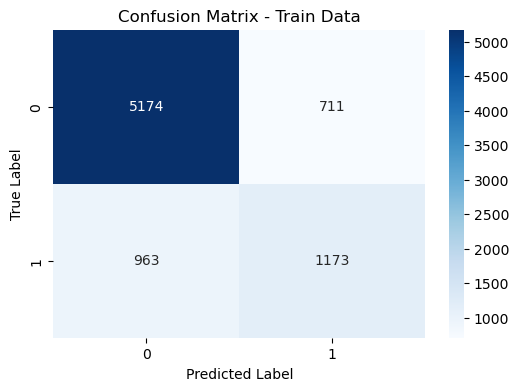

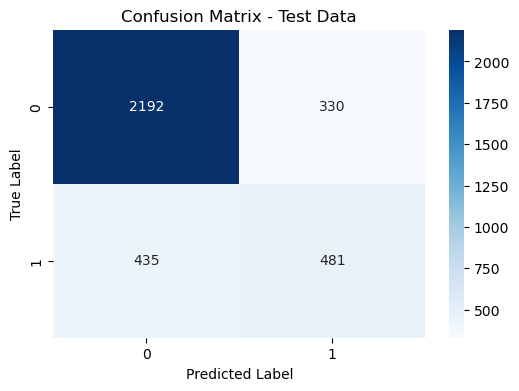

In [173]:
# Confusion Matrix for Train Data
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Test Data
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


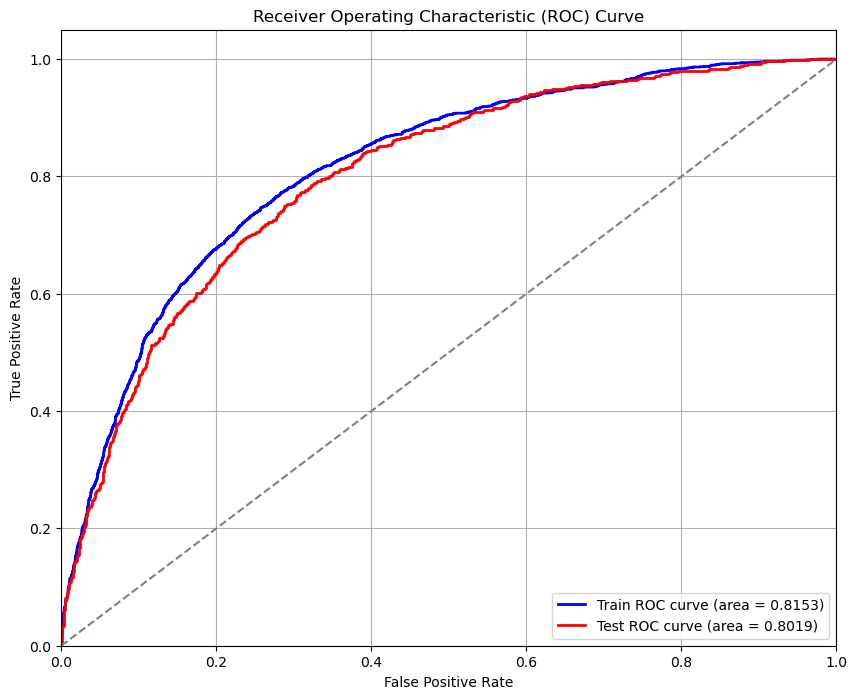

In [174]:
# Predictions for Train Data
y_pred_train_proba = model.predict(X_train_final).ravel()  # Flatten the array to 1D for ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

# Predictions for Test Data
y_pred_test_proba = model.predict(X_test_final).ravel()  # Flatten the array to 1D for ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting ROC Curve
plt.figure(figsize=(10, 8))

plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_train:.4f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [175]:
X_test_final.columns

Index(['EF', 'ACS_1.0', 'PRIOR CMP_1.0', 'UREA', 'HB', 'CREATININE', 'CAD_1.0',
       'DM_1.0', 'STABLE ANGINA_1.0'],
      dtype='object')

#### Creating joblib file for ANN model with top 9 features for deployment

In [176]:
import joblib

In [177]:
joblib.dump(model, 'cvnn_joblib')

['cvnn_joblib']